# Interpolating Network Sets

Frequently a set of `Networks` is recorded while changing some other parameters; like temperature, voltage, current, etc. Once this set of data acquired, it is sometime usefull to estimate the behaviour of the network for parameter values that lie in between those that have been mesured. For that purpose, interpolating a network from a set of network is possible. This example demonstrates how to do this using [NetworkSets](../../tutorials/NetworkSet.ipynb).

In [2]:
import skrf as rf 
import matplotlib.pyplot as plt
import numpy as np
rf.stylely()

C:\Users\JH218595\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\style\core.py:112: UserWarning: Style includes a parameter, 'interactive', that is not related to style.  Ignoring
  _apply_style(rc)


## Narda 3752 phase shifter

In this example, we are characterizing a old [narda phase shifter 3752](https://nardamiteq.com/docs/119-PHASESHIFTERS.PDF) at 1.5 GHz. 
![narda 3752 phase shifter](phase_shifter_measurements/Narda_3752.jpg) :

In order to deduce the phase shift that one can obtain at this specific frequency, we have measured scattering parameters in the 1-2 GHz band at 19 positions of the phase knob (from 0 to 180). These measurements are loaded into a [NetworkSets](../../tutorials/NetworkSet.ipynb) object:

In [3]:
# Array containing the 19 phase shift indicator values
indicators_mes = np.linspace(0, 180, num=19)  # from 0 to 180 per 10

In [6]:
ntw_set = rf.NetworkSet.from_zip('phase_shifter_measurements/phase_shifter_measurements.zip')
print('ntw_set contains', len(ntw_set), 'networks')

ntw_set contains 19 networks


We extract from the network set the phase shift and $S_{11}$ at the specific frequency of 1.5 GHz:

In [5]:
f = '1.5 GHz'
phases_mes = np.squeeze([ntw[f].s21.s_deg for ntw in ntw_set])
s11_mes = np.squeeze([ntw[f].s11.s_db for ntw in ntw_set])

We would like however to get the phase shift values for intermediate settings of this phase shifter. To that purpose, let's create a network from the interpolation of the measured networks. 

In [7]:
# the indicator values for which we want to interpolate the network
indicators = np.linspace(0, 180, num=181)  # every degrees for 0 to 180

phases_interp = [ntw_set.interpolate_from_network(indicators_mes, phi)['1.5GHz'].s21.s_deg for phi in indicators]
phases_interp = np.squeeze(phases_interp)

s11_interp = [ntw_set.interpolate_from_network(indicators_mes, phi, interp_kind='quadratic')['1.5GHz'].s11.s_db for phi in indicators]
s11_interp = np.squeeze(s11_interp)

print('We have interpolated the network for', len(phases_interp), 'points')

We have interpolated the network for 181 points


Now let's plot everything

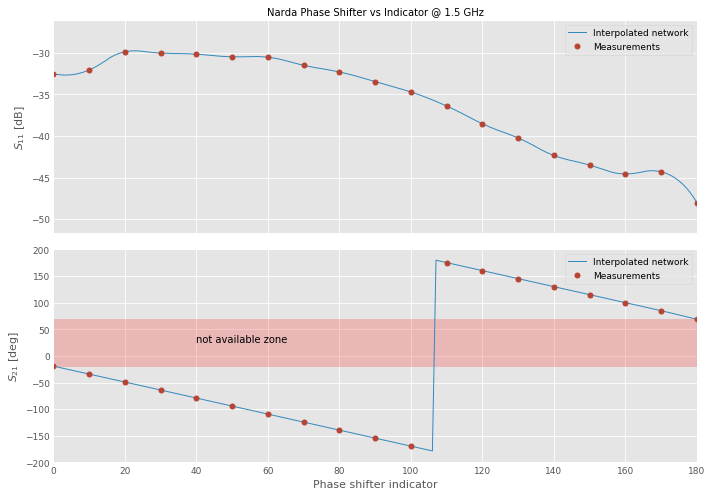

In [8]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,7), sharex=True)
ax1.set_title('Narda Phase Shifter vs Indicator @ 1.5 GHz', fontsize=10)
ax1.plot(indicators, s11_interp, label='Interpolated network')
ax1.plot(indicators_mes, s11_mes, '.', ms=10, label='Measurements')
ax1.legend()
ax1.set_ylabel(r'$S_{11}$ [dB]')

ax2.plot(indicators, phases_interp, label='Interpolated network')
ax2.plot(indicators_mes, phases_mes, '.', ms=10, label='Measurements')
ax2.set_xlabel('Phase shifter indicator')
ax2.set_ylabel('$S_{21}$ [deg]')

ax2.fill_between(indicators, phases_mes[0], phases_mes[-1], alpha=0.2, color='r')
ax2.text(40, 25, 'not available zone')
ax2.legend()
ax2.set_ylim(-200, 200)

fig.tight_layout()